In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
#load all sheets to a dict
sheets = pd.read_excel('../Springboard Capstone Two/online_retail_II.xlsx', sheet_name=None, parse_dates=['InvoiceDate'])
sheets

{'Year 2009-2010':        Invoice StockCode                          Description  Quantity  \
 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
 1       489434    79323P                   PINK CHERRY LIGHTS        12   
 2       489434    79323W                  WHITE CHERRY LIGHTS        12   
 3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
 4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
 ...        ...       ...                                  ...       ...   
 525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
 525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
 525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
 525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
 525460  538171     21931               JUMBO STORAGE BAG SUKI         2   
 
                InvoiceDate  Price  Customer ID         Country  
 0

In [3]:
#concatenate all sheets into one dataframe, reset index
df = pd.concat((sheets[frame] for frame in sheets.keys()), ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
#rename the Customer ID column
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [5]:
df.shape

(1067371, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [7]:
#convert the Customer ID data type from float to integer
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [8]:
#stats for numeric columns
df.describe()

,Quantity,Price,CustomerID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
#number of unique values for each column
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
CustomerID      5942
Country           43
dtype: int64

In [10]:
#frequency counts for categorical column
df['Country'].value_counts(dropna=False)

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
USA                        535
Poland                     535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [11]:
#check for missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

In [12]:
#drop all rows with missing Customer ID
df = df[df['CustomerID'].notna()]
df.shape

(824364, 8)

In [13]:
#check for missing values again
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [15]:
#remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(797885, 8)

In [16]:
df.describe()

,Quantity,Price,CustomerID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
#keep entries with price larger than zero
df = df[df['Price'] > 0]
df.shape

(797815, 8)

In [18]:
#remove the Description column as it's not needed for the analysis
df.drop(columns='Description', inplace=True)

Quantity       AxesSubplot(0.125,0.125;0.352273x0.755)
Price       AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

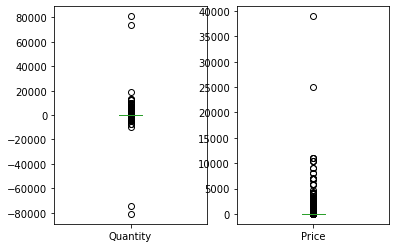

In [19]:
#check for outliers
df.plot(kind='box', y=['Quantity', 'Price'], subplots=True)

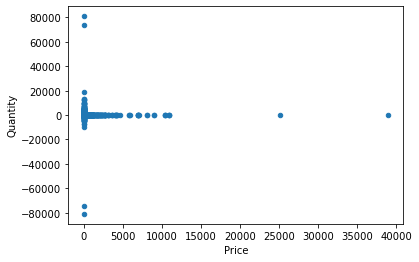

In [20]:
df.plot(kind='scatter', x='Price', y='Quantity')

In [22]:
#remove outliers using winsorization
df['Quantity_winsorized'] = winsorize(df['Quantity'], limits=[0.01, 0.01])
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Quantity_winsorized
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,48
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,24


In [25]:
#add column for total sales for each entry
df['TotalPrice'] = df['Quantity_winsorized'] * df['Price']
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Quantity_winsorized,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,83.4
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,81.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,81.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,48,100.8
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,24,30.0


In [28]:
#save the data
df.to_csv('../Springboard Capstone Two/data_wrangling.csv')